# CA6 - Question Answering using Bert, Albert

# Part 1 - PQuad Dataset 

Import libraries

In [ ]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 7.8 MB/s 
     |████████████████████████████████| 6.6 MB 57.1 MB/s 
     |████████████████████████████████| 596 kB 65.9 MB/s 
     |████████████████████████████████| 101 kB 12.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 8.8 MB/s 
     |████████████████████████████████| 140 kB 69.0 MB/s 
     |████████████████████████████████| 1.1 MB 64.4 MB/s 
     |████████████████████████████████| 212 kB 64.5 MB/s 
     |████████████████████████████████| 127 kB 75.7 MB/s 
     |████████████████████████████████| 144 kB 73.3 MB/s 
     |████████████████████████████████| 94 kB 4.6 MB/s 
     |█████████████

In [ ]:
import json
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/Sheyda/Data - QA/PQaud'

## Preprocessing Datasets

In [ ]:
def json_to_dataframe(file):
    f = open ( file , "r") 
    data = json.loads(f.read())               #loading the json file.
    iid = []                                  
    tit = []                                  #Creating empty lists to store values.
    con = []
    Que = []
    ans = []
    
    for i in range(len(data['data'])):       #Root tag of the json file contains 'title' tag & 'paragraphs' list.
        for p in range(len(data['data'][i]['paragraphs'])):  # 'paragraphs' list contains 'context' tag & 'qas' list.
            context = data['data'][i]['paragraphs'][p]['context']
            for q in range(len(data['data'][i]['paragraphs'][p]['qas'])):  # 'qas' list contains 'question', 'Id' tag & 'answers' list.
                question = data['data'][i]['paragraphs'][p]['qas'][q]['question']
                Id = data['data'][i]['paragraphs'][p]['qas'][q]['id']
                answer_texts = [] 
                answer_starts = []
                for a in range(len(data['data'][i]['paragraphs'][p]['qas'][q]['answers'])): # 'answers' list contains 'ans_start', 'text' tags. 
                    answer_texts.append(data['data'][i]['paragraphs'][p]['qas'][q]['answers'][a]['text'])
                    answer_starts.append(data['data'][i]['paragraphs'][p]['qas'][q]['answers'][a]['answer_start'])
                    if len(answer_texts) == 0:
                      answer_texts.append('')
                      answer_starts.append(0)
                    con.append(context)
                    Que.append(question)                    # Appending values to lists
                    iid.append(Id)
                    ans.append({'text': answer_texts, 'answer_start': answer_starts })

    new_df = pd.DataFrame(columns=['id','context','question','answers']) # Creating empty DataFrame.
    new_df.id = iid
    new_df.context = con
    new_df.question = Que
    new_df.answers = ans

    return new_df

In [ ]:
train_df = json_to_dataframe(os.path.join(data_path,'train_samples.json'))

In [ ]:
train_df.head()

,id,context,question,answers
0,874587,عبّاس میرزا (۴ ذی‌الحجهٔ ۱۲۰۳ ه‍.ق/۲۶ اوت ۱۷۸۹...,عبّاس میرزا در چه تاریخی به دنیا آمد؟,{'text': ['۴ ذی‌الحجهٔ ۱۲۰۳ ه‍.ق/۲۶ اوت ۱۷۸۹ م...
1,874588,عبّاس میرزا (۴ ذی‌الحجهٔ ۱۲۰۳ ه‍.ق/۲۶ اوت ۱۷۸۹...,عبّاس میرزا در چه تاریخی درگذشت؟,{'text': ['۱۰ جمادی‌الثانی ۱۲۴۹ ه‍.ق/۲۵ اکتبر ...
2,874589,عبّاس میرزا (۴ ذی‌الحجهٔ ۱۲۰۳ ه‍.ق/۲۶ اوت ۱۷۸۹...,عبّاس میرزا که بود؟,{'text': ['نامدار به عبّاس میرزا نایِبُ‌السَّل...
3,874590,عبّاس میرزا (۴ ذی‌الحجهٔ ۱۲۰۳ ه‍.ق/۲۶ اوت ۱۷۸۹...,عبّاس میرزا در چه سال‌هایی ولایتعهدی ایران و ن...,"{'text': ['سال‌های ۱۷۹۷ تا ۱۸۳۳ م'], 'answer_s..."
4,874591,عبّاس میرزا (۴ ذی‌الحجهٔ ۱۲۰۳ ه‍.ق/۲۶ اوت ۱۷۸۹...,عبّاس میرزا فرزند کدام پادشاه ایران است؟,"{'text': ['فتحعلی‌شاه'], 'answer_start': [161]}"


In [ ]:
test_df = json_to_dataframe(os.path.join(data_path,'test_samples.json'))
test_df.head()

,id,context,question,answers
0,1719422,این تیم در سال ۱۸۹۹ تأسیس شد و تا به حال موفق...,تیم آینتراخت فرانکفورت در چه سالی تاسیس شد؟,"{'text': ['۱۸۹۹', 'سال ۱۸۹۹', 'در سال ۱۸۹۹'], ..."
1,1719422,این تیم در سال ۱۸۹۹ تأسیس شد و تا به حال موفق...,تیم آینتراخت فرانکفورت در چه سالی تاسیس شد؟,"{'text': ['۱۸۹۹', 'سال ۱۸۹۹', 'در سال ۱۸۹۹'], ..."
2,1719422,این تیم در سال ۱۸۹۹ تأسیس شد و تا به حال موفق...,تیم آینتراخت فرانکفورت در چه سالی تاسیس شد؟,"{'text': ['۱۸۹۹', 'سال ۱۸۹۹', 'در سال ۱۸۹۹'], ..."
3,1719423,این تیم در سال ۱۸۹۹ تأسیس شد و تا به حال موفق...,تیم آینتراخت فرانکفورت دارای چند عنوان قهرمانی...,"{'text': ['یک'], 'answer_start': [54]}"
4,1719424,این تیم در سال ۱۸۹۹ تأسیس شد و تا به حال موفق...,تیم آینتراخت فرانکفورت دارای چند عنوان قهرمانی...,"{'text': ['۵'], 'answer_start': [86]}"


In [ ]:
val_df = json_to_dataframe(os.path.join(data_path,'validation_samples.json'))
val_df.head()

,id,context,question,answers
0,1928644,وست‌لایف(به انگلیسی: Westlife) یک گروه مشهور ا...,وست‌لایف چیست؟,"{'text': ['یک گروه مشهور ایرلندی', 'یک گروه مش..."
1,1928644,وست‌لایف(به انگلیسی: Westlife) یک گروه مشهور ا...,وست‌لایف چیست؟,"{'text': ['یک گروه مشهور ایرلندی', 'یک گروه مش..."
2,1928645,وست‌لایف(به انگلیسی: Westlife) یک گروه مشهور ا...,وست‌لایف در چه تاریخی به‌طور رسمی بنیان گذاشته...,"{'text': ['۳ ژوئیه سال ۱۹۹۸', 'در ۳ ژوئیه سا..."
3,1928645,وست‌لایف(به انگلیسی: Westlife) یک گروه مشهور ا...,وست‌لایف در چه تاریخی به‌طور رسمی بنیان گذاشته...,"{'text': ['۳ ژوئیه سال ۱۹۹۸', 'در ۳ ژوئیه سا..."
4,1928646,وست‌لایف(به انگلیسی: Westlife) یک گروه مشهور ا...,وست‌لایف با چند عضو سال ۱۹۹۸ به ‌طور رسمی بنی...,"{'text': ['۵', 'با ۵ نفر عضو', '۵ نفر'], 'answ..."


In [ ]:
from datasets import Dataset
train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)
test_ds = Dataset.from_pandas(test_df)

In [ ]:
train_ds[1]

{'answers': {'answer_start': [51],
  'text': ['۱۰ جمادی\u200cالثانی ۱۲۴۹ ه\u200d.ق/۲۵ اکتبر ۱۸۳۳ م']},
 'context': 'عبّاس میرزا (۴ ذی\u200cالحجهٔ ۱۲۰۳ ه\u200d.ق/۲۶ اوت ۱۷۸۹ م – ۱۰ جمادی\u200cالثانی ۱۲۴۹ ه\u200d.ق/۲۵ اکتبر ۱۸۳۳ م) نامدار به عبّاس میرزا نایِبُ\u200cالسَّلطَنه از شاهزادگان قاجار و فرزند فتحعلی\u200cشاه و آسیه\u200cخانم دولو بود که در فاصلهٔ سال\u200cهای ۱۷۹۷ تا ۱۸۳۳ م ولایتعهدی ایران و نیابت سلطنت پدرش در آذربایجان را بر عهده داشت. او پیش از مرگ پدرش درگذشت و پسرش محمد میرزا جانشین او شد.',
 'id': '874588',
 'question': 'عبّاس میرزا در چه تاریخی درگذشت؟'}

In [ ]:
train_ds

Dataset({
    features: ['id', 'context', 'question', 'answers'],
    num_rows: 5917
})

In [ ]:
train_ds['answers'][0]

{'answer_start': [13],
 'text': ['۴ ذی\u200cالحجهٔ ۱۲۰۳ ه\u200d.ق/۲۶ اوت ۱۷۸۹ م']}

## Pars Bert config

In [ ]:
from transformers import AutoConfig, AutoTokenizer, AutoModel, AutoModelForQuestionAnswering
from transformers import TrainingArguments
import transformers

In [ ]:
config = AutoConfig.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
model = AutoModelForQuestionAnswering.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")

Some weights of the model checkpoint at HooshvareLab/bert-base-parsbert-uncased were not used when initializing BertForQuestionAnswering: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForQuestionAnswering were not initia

Max Length = 322

In [ ]:
for i, example in enumerate(train_ds):
    if len(tokenizer(example["question"], example["context"])["input_ids"]) > 318:
        break
example = train_ds[i]

In [ ]:
example

{'answers': {'answer_start': [9], 'text': ['گاوین هامبلی']},
 'context': 'به\u200cگفتهٔ گاوین هامبلی، قلمرو ایران در روزگار فتحعلی\u200cشاه مِلکی را می\u200cمانست که مالکان متوالی\u200cاش مدت\u200cها از آن غفلت کرده\u200cاند. ناظران اروپایی ایران در اوایل سدهٔ نوزدهم میلادی تردید داشتند که حکومت فتحعلی\u200cشاه اراده یا امکانِ آبادانیِ این ملکِ ویران را داشته باشد. اما بااین\u200cهمه، این واقعیت است که دورهٔ سلطنت فتحعلی\u200cشاه نظمی کافی و حکومتی کارآمد فراهم آورد تا برخی اصلاحاتِ اقتصادی امکان\u200cپذیر شود. ناظران اروپایی در آن دوره، از حکومت\u200cهای آغازینِ قاجار به\u200cخاطر فساد، خشونت و بی\u200cلیاقتی انتقاد می\u200cکردند، اما بااین\u200cحال، ایرانِ روزگارِ فتحعلی\u200cشاه بسی آسوده\u200cتر و مرفه\u200cتر از اواخر عهدِ صفوی بود. اما از سویی، نبود مرزی معین در پیرامون قلمروِ حکومت مسئله\u200cای دردسرساز بود. زاگرس\u200cنشینانِ غربی به عثمانی آزادانه رفت\u200cوآمد داشتند؛ محمدعلی میرزا به\u200cعنوان حکمران کرمانشاه، لرستان و خوزستان، و عباس میرزا به\u200cعنوان حکمران ا

In [ ]:
len(tokenizer(example["question"], example["context"])["input_ids"])

330

In [ ]:
max_length = 300 # The maximum length of a feature (question and context)

In [ ]:
def prepare_train_features(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        # stride=stride,
        # return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )
  
    offset_mapping = inputs.pop("offset_mapping")
    # sample_map = inputs.pop("overflow_to_sample_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        # sample_idx = sample_map[i]
        answer = answers[i]
        
        if answer['text'][0] == '':
           start_positions.append(0)
           end_positions.append(0)
           continue
        
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label is (0, 0)
        if offset[context_start][0] > start_char or offset[context_end][1] < end_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

In [ ]:
tokenized_train = train_ds.map(prepare_train_features, batched=True, remove_columns=train_ds.column_names)

Parameter 'function'=<function prepare_train_features at 0x7fb128e81b90> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


  0%|          | 0/6 [00:00<?, ?ba/s]

In [ ]:
tokenized_val = val_ds.map(prepare_train_features, batched=True, remove_columns=val_ds.column_names)

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
train_ds.column_names

['id', 'context', 'question', 'answers']

In [ ]:
def preprocess_test_examples(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        # stride=stride,
        # return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    # sample_map = inputs.pop("overflow_to_sample_mapping")
    example_ids = []

    for i in range(len(inputs["input_ids"])):
        # sample_idx = sample_map[i]
        # example_ids.append(examples["id"][i])
        sequence_ids = inputs.sequence_ids(i)
        offset = inputs["offset_mapping"][i]
        inputs["offset_mapping"][i] = [
            o if sequence_ids[k] == 1 else None for k, o in enumerate(offset)
        ]

    # inputs["example_id"] = example_ids
    return inputs

In [ ]:
dataset_test_preprocessed = test_ds.map(
    preprocess_test_examples,
    batched=True,
    remove_columns=['context', 'answers', 'question'],
)

  0%|          | 0/2 [00:00<?, ?ba/s]

In [ ]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

In [ ]:
from datasets import load_metric
metric = load_metric("squad")

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    "bert-finetuned-squad",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01,

)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
)

trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 5917
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2220


Epoch,Training Loss,Validation Loss
1,1.865500,1.226043
2,0.979100,1.233559
3,0.397800,1.393670


***** Running Evaluation *****
  Num examples = 1184
  Batch size = 8
Saving model checkpoint to bert-finetuned-squad/checkpoint-740
Configuration saved in bert-finetuned-squad/checkpoint-740/config.json
Model weights saved in bert-finetuned-squad/checkpoint-740/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-740/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-740/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1184
  Batch size = 8
Saving model checkpoint to bert-finetuned-squad/checkpoint-1480
Configuration saved in bert-finetuned-squad/checkpoint-1480/config.json
Model weights saved in bert-finetuned-squad/checkpoint-1480/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-1480/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-1480/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1184
  Batch size = 8
Saving 

TrainOutput(global_step=2220, training_loss=0.9264968356570682, metrics={'train_runtime': 740.1898, 'train_samples_per_second': 23.982, 'train_steps_per_second': 2.999, 'total_flos': 2717741442668400.0, 'train_loss': 0.9264968356570682, 'epoch': 3.0})

In [ ]:
trainer.save_model("test-squad-trained")

Saving model checkpoint to test-squad-trained
Configuration saved in test-squad-trained/config.json
Model weights saved in test-squad-trained/pytorch_model.bin
tokenizer config file saved in test-squad-trained/tokenizer_config.json
Special tokens file saved in test-squad-trained/special_tokens_map.json


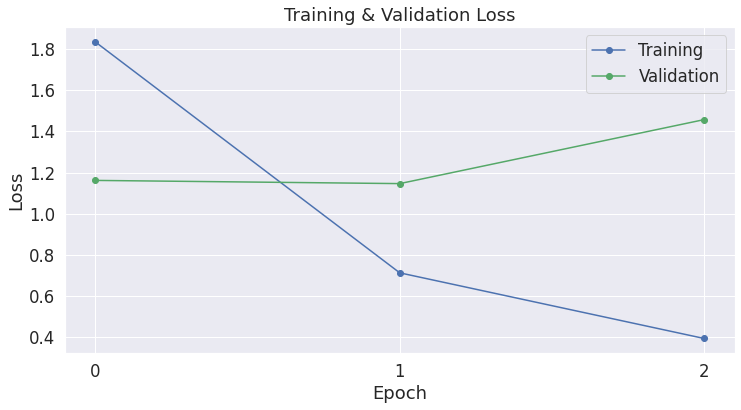

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot([1.834100, 0.713400,0.394800	], 'b-o', label="Training")
plt.plot([1.162066, 1.146545, 1.457134], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks(list(range(3)))

plt.show()


In [ ]:
predictions, a, b = trainer.predict(dataset_test_preprocessed)


The following columns in the test set don't have a corresponding argument in `BertForQuestionAnswering.forward` and have been ignored: id, offset_mapping. If id, offset_mapping are not expected by `BertForQuestionAnswering.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1048
  Batch size = 8


In [ ]:
b

{'test_runtime': 13.2111,
 'test_samples_per_second': 79.327,
 'test_steps_per_second': 9.916}

In [ ]:
from tqdm.auto import tqdm

import collections

import numpy as np

n_best = 1000
max_answer_length = 50


def compute_metrics(start_logits, end_logits, features, examples):
    # example_to_features = collections.defaultdict(list)
    # for idx, feature in enumerate(features):
        # example_to_features[feature["example_id"]].append(idx)

    predicted_answers = []
    for i, example in enumerate(examples):
        example_id = example["id"]
        context = example["context"]
        answers = []
        start_logit = start_logits[i]
        end_logit = end_logits[i]
        offsets = features[i]["offset_mapping"]
        start_indexes = np.argsort(start_logit)[-1 : -n_best - 1 : -1].tolist()
        end_indexes = np.argsort(end_logit)[-1 : -n_best - 1 : -1].tolist()
        start_indexes = np.argsort(start_logit)[-1 : -n_best - 1 : -1].tolist()
        end_indexes = np.argsort(end_logit)[-1 : -n_best - 1 : -1].tolist()
        for start_index in start_indexes:
            for end_index in end_indexes:
                # Skip answers that are not fully in the context
                if offsets[start_index] is None or offsets[end_index] is None:
                    continue
                # Skip answers with a length that is either < 0 or > max_answer_length
                if (
                    end_index < start_index
                    or end_index - start_index + 1 > max_answer_length
                ):
                    continue

                answer = {
                    "text": context[offsets[start_index][0] : offsets[end_index][1]],
                    "logit_score": start_logit[start_index] + end_logit[end_index],
                }
                answers.append(answer)

        # Loop through all features associated with that example
        # for feature_index in example_to_features[example_id]:
            # start_logit = start_logits[feature_index]
            # end_logit = end_logits[feature_index]
            # offsets = features[feature_index]["offset_mapping"]

            
        # Select the answer with the best score
        if len(answers) > 0:
            best_answer = max(answers, key=lambda x: x["logit_score"])
            predicted_answers.append(
                {"id": example_id, "prediction_text": best_answer["text"]}
            )
        else:
            predicted_answers.append({"id": example_id, "prediction_text": ""})

    theoretical_answers = [{"id": ex["id"], "answers": ex["answers"]} for ex in examples]
    return metric.compute(predictions=predicted_answers, references=theoretical_answers)

In [ ]:
start_logits, end_logits = predictions
compute_metrics(start_logits, end_logits, dataset_test_preprocessed, test_ds)


{'exact_match': 63.93129770992366, 'f1': 84.67602474681047}

## Albert Config

In [ ]:
config = AutoConfig.from_pretrained("HooshvareLab/albert-fa-zwnj-base-v2")
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/albert-fa-zwnj-base-v2")
model = AutoModelForQuestionAnswering.from_pretrained("HooshvareLab/albert-fa-zwnj-base-v2")

Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/837k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/186 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at HooshvareLab/albert-fa-zwnj-base-v2 were not used when initializing AlbertForQuestionAnswering: ['predictions.decoder.bias', 'predictions.LayerNorm.weight', 'predictions.decoder.weight', 'predictions.dense.weight', 'predictions.bias', 'predictions.LayerNorm.bias', 'predictions.dense.bias']
- This IS expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of AlbertForQuestionAnswering were not initialized from the model checkpoint at HooshvareLab/albert-fa-zwnj-base-v2 and are newly initialized: ['qa_outputs.weight', 'qa_

In [ ]:
os.system('CUDA_LAUNCH_BLOCKING=1')

0

In [ ]:
from transformers import Trainer
from transformers import TrainingArguments

args = TrainingArguments(
    "bert-finetuned-squad",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=3,
    weight_decay=0.01,
    # fp16=True,
    # push_to_hub=False,
)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer
)
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 5917
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2220


Epoch,Training Loss,Validation Loss
1,2.651000,1.811999
2,1.555000,1.738862
3,0.899900,1.825861


***** Running Evaluation *****
  Num examples = 1184
  Batch size = 8
Saving model checkpoint to bert-finetuned-squad/checkpoint-740
Configuration saved in bert-finetuned-squad/checkpoint-740/config.json
Model weights saved in bert-finetuned-squad/checkpoint-740/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-740/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-740/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1184
  Batch size = 8
Saving model checkpoint to bert-finetuned-squad/checkpoint-1480
Configuration saved in bert-finetuned-squad/checkpoint-1480/config.json
Model weights saved in bert-finetuned-squad/checkpoint-1480/pytorch_model.bin
tokenizer config file saved in bert-finetuned-squad/checkpoint-1480/tokenizer_config.json
Special tokens file saved in bert-finetuned-squad/checkpoint-1480/special_tokens_map.json
***** Running Evaluation *****
  Num examples = 1184
  Batch size = 8
Saving 

TrainOutput(global_step=2220, training_loss=1.5222050915967236, metrics={'train_runtime': 696.4451, 'train_samples_per_second': 25.488, 'train_steps_per_second': 3.188, 'total_flos': 229693118828400.0, 'train_loss': 1.5222050915967236, 'epoch': 3.0})

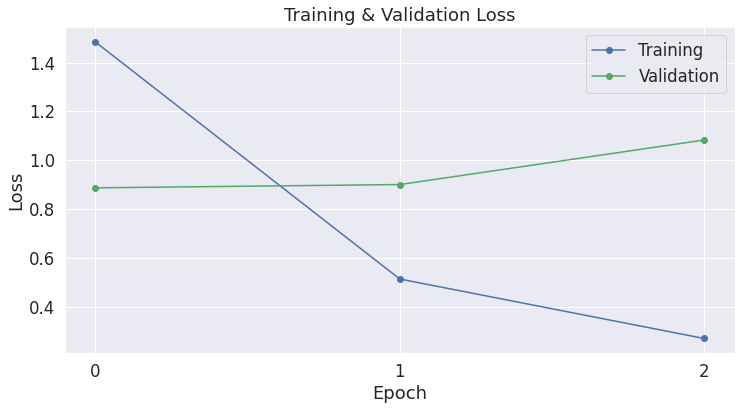

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot([1.484000	, 0.514900,0.271800		], 'b-o', label="Training")
plt.plot([0.887569, 0.901105, 1.083094], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks(list(range(3)))

plt.show()

In [ ]:
predictions, a, b = trainer.predict(dataset_test_preprocessed)


The following columns in the test set don't have a corresponding argument in `AlbertForQuestionAnswering.forward` and have been ignored: offset_mapping, id. If offset_mapping, id are not expected by `AlbertForQuestionAnswering.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1048
  Batch size = 8


In [ ]:
b

{'test_runtime': 14.4754,
 'test_samples_per_second': 72.399,
 'test_steps_per_second': 9.05}

In [ ]:
start_logits, end_logits = predictions
compute_metrics(start_logits, end_logits, dataset_test_preprocessed, test_ds)


{'exact_match': 54.48473282442748, 'f1': 73.7253287933646}